# Análisis Exploratorio de Datos (E.D.A.)

In [2]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

%matplotlib inline


In [3]:
#Abrimos el csv con pandas para su posterior tratamiento y visualización
movies_data = pd.read_csv('data_movies.csv')
movies_data.head(3)

C:\Users\ABANIBI\AppData\Local\Temp\ipykernel_17628\2795674273.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_data = pd.read_csv('data_movies.csv')


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return,month,weekday
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,81.0,['English'],Released,NaN,Toy Story,7.7,1995.0,12.451801,Octubre,Lunes
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995.0,4.043035,Diciembre,Viernes
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.7129,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995.0,0.000000,Diciembre,Viernes


In [4]:
#Verificamos datos y columnas
movies_data.shape

(45379, 21)

In [5]:
#Verificamos datos del dataset valores nulos y tipos de datos
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45376 non-null  float64
 2   genres                 45379 non-null  object 
 3   id                     45379 non-null  object 
 4   original_language      45368 non-null  object 
 5   overview               44438 non-null  object 
 6   popularity             45377 non-null  object 
 7   production_companies   45379 non-null  object 
 8   production_countries   45379 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45379 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       45379 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

In [6]:
#Verificamos lan cantidad de nulos registrados en las columnas
movies_data.isnull().sum()

belongs_to_collection    40891
budget                       3
genres                       0
id                           0
original_language           11
overview                   941
popularity                   2
production_companies         0
production_countries         0
release_date                 3
revenue                      0
runtime                    249
spoken_languages             0
status                      83
tagline                  24981
title                        3
vote_average                 3
release_year                 3
return                       0
month                        3
weekday                      3
dtype: int64

In [7]:
#Eliminamos nulos
data_sin_nulos = movies_data.dropna()

In [8]:
data_sin_nulos.isnull().sum()

belongs_to_collection    0
budget                   0
genres                   0
id                       0
original_language        0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
vote_average             0
release_year             0
return                   0
month                    0
weekday                  0
dtype: int64

In [9]:
# Verificamos la función describe() para obtener un resumen estadistico
data_sin_nulos.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,2572.0,2.231318e+07,4.487442e+07,0.0,0.0,800000.0,2.100000e+07,3.800000e+08
revenue,2572.0,9.255741e+07,2.074562e+08,0.0,0.0,53025.5,8.230738e+07,2.787965e+09
runtime,2572.0,9.926166e+01,2.368644e+01,0.0,88.0,96.0,1.080000e+02,4.760000e+02
vote_average,2572.0,5.857193e+00,1.233778e+00,0.0,5.2,6.0,6.600000e+00,1.000000e+01
release_year,2572.0,1.993670e+03,1.915561e+01,1930.0,1984.0,1999.0,2.009000e+03,2.017000e+03
return,2572.0,4.067766e+02,2.008678e+04,0.0,0.0,0.0,3.403844e+00,1.018619e+06


In [27]:
# Calculamos el promedio de la columna 'revenue'
data_sin_nulos['revenue'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 2                0.0
4         76578911.0
9        352194034.0
12        11348324.0
18       212385533.0
            ...     
45156            0.0
45157            0.0
45174            0.0
45268            0.0
45273            0.0
Name: revenue, Length: 2572, dtype: float64>

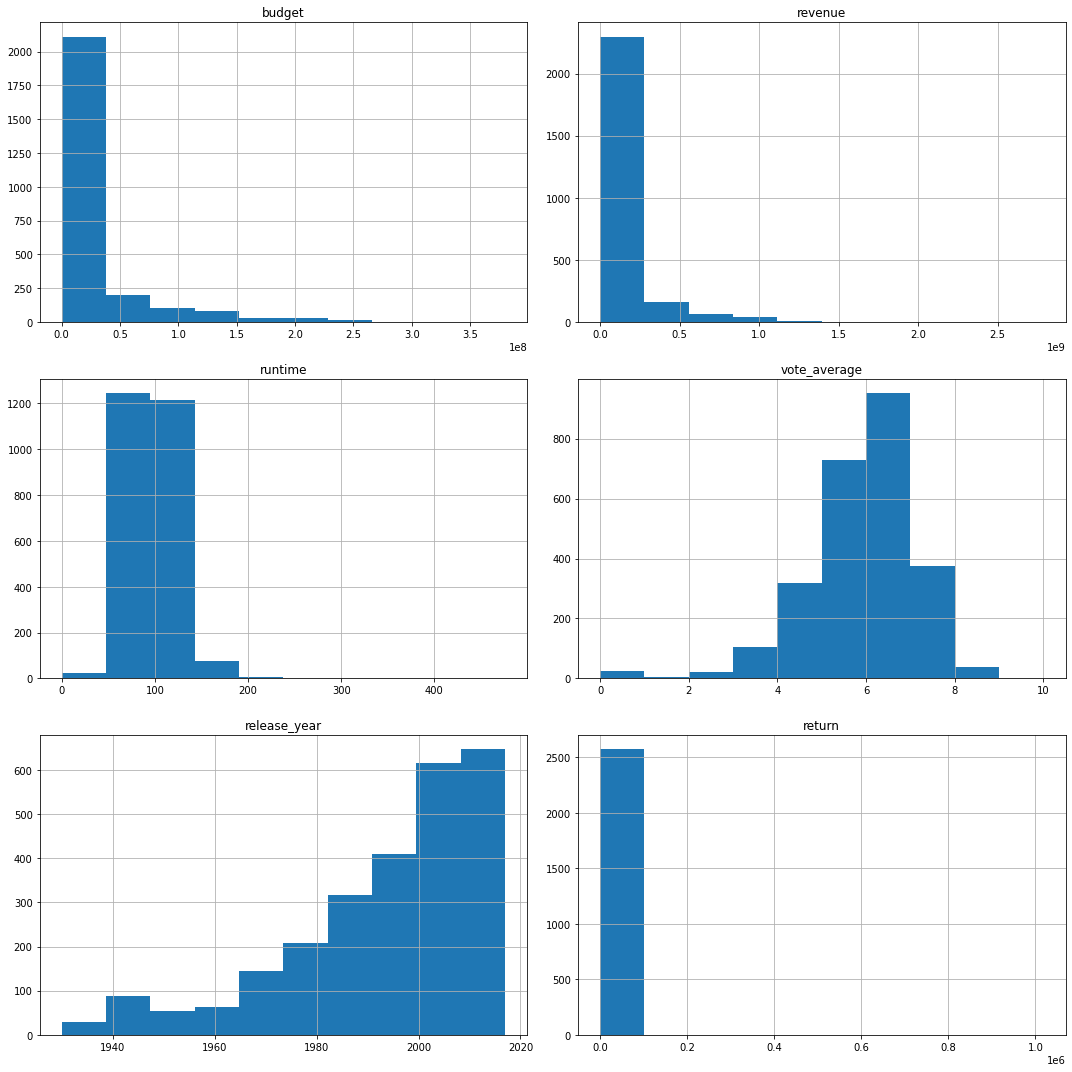

In [28]:
#Generamos histograma para visualizar la data
data_sin_nulos.hist(figsize=(15,15)) 
plt.tight_layout() 
plt.show()

In [29]:
#Verificamos datos duplicados
data_sin_nulos.duplicated().sum()

0

In [30]:
#Este código calcula la proporción de valores nulos en cada columna del DataFrame movies_data y muestra solamente aquellas columnas que tienen valores nulos.
null = movies_data.isna().sum()/len(movies_data)
null[null > 0].sort_values()

popularity               0.000044
budget                   0.000066
release_date             0.000066
title                    0.000066
vote_average             0.000066
release_year             0.000066
month                    0.000066
weekday                  0.000066
original_language        0.000242
status                   0.001829
runtime                  0.005487
overview                 0.020736
tagline                  0.550497
belongs_to_collection    0.901100
dtype: float64

In [24]:
#Creamos el informe de perfilado de datos
profile = ProfileReport(movies_data, title='Reporte de Perfilado de Datos', explorative=True)


In [31]:
#Se crea un archivo HTML llamado 'movies.html' que contendrá el reporte generado por el perfilador de datos
profile.to_file(output_file='movies.html')


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
# Crearemos  un  informe del perfil exploratorio en forma de widgets interactivos, para poder navegar por los diferentes aspectos del perfil.
profile.to_widgets()
